In [33]:
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import deque
import random
from graph_tool.all import *
import graph_tool.draw as gd
print(os.getcwd())
#os.chdir('')
log_name = './log.txt'
print(os.getcwd())

ImportError: cannot import name 'graph_draw'

In [3]:
FB = np.loadtxt(fname = './facebook_combined.txt', delimiter=' ', comments='#', dtype=int)
print(FB)
print(len(FB))

[[   0    1]
 [   0    2]
 [   0    3]
 ...
 [4027 4032]
 [4027 4038]
 [4031 4038]]
88234


In [4]:
A = np.loadtxt(fname = './CA-GrQc.txt', delimiter='\t', comments='#', dtype=int)
print(len(A))

28980


In [5]:
def getdeg(G,breaks=None,st=0):
    deg = {}
    for p in G:
        #print(p[0], p[1])
        if deg.get(p[0]) is None:
            deg[p[0]] = 1
        if deg.get(p[1]) is None:
            deg[p[1]] = 1
        deg[p[0]] = deg[p[0]] + 1
        deg[p[1]] = deg[p[1]] + 1
#print(deg)
    n = max(deg.values())
    print(n)
    H = [0] * (n + 1)
    for v in deg.values():
        H[v] = H[v] + 1
    print(H[0])
    X = np.arange(st,n+1)
    if not breaks:
        breaks = len(X)
    _ = plt.hist(X, bins = breaks, weights=H[st:n+1])

163
0


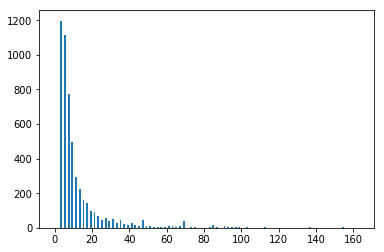

In [6]:
getdeg(A)

1046
0


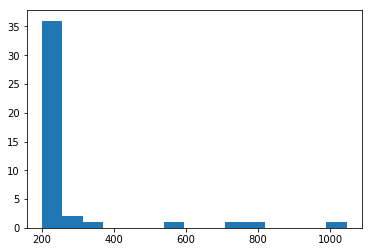

In [7]:
getdeg(FB, breaks=15, st = 200)

In [8]:
def dehash_and_listize(G):
    hasher = []
    for e in G:
        hasher.append(e[0])
        hasher.append(e[1])
    hasher = list(set(hasher))
    print(hasher[:50])
    dehasher = {}
    for i, h in enumerate(hasher):
        dehasher[h] = i 
    
    n = len(hasher)
    adj_G = [[] for _ in range(n)]
    for e in G:
        if e[0] == e[1]: continue
        adj_G[dehasher[e[0]]].append(dehasher[e[1]])
        adj_G[dehasher[e[1]]].append(dehasher[e[0]])
    #print(type(G))
    return hasher, adj_G

hasher_A,adjlist_A = dehash_and_listize(A)
hasher_FB,adjlist_FB = dehash_and_listize(FB)
#print(hasher_A[:-20:-1])
#print(max(dehashed_A.reshape(-1)))
#for i in range(20):
#    print(hasher_A[i],end = ' : ')
#    for j in adjlist_A[i]:
#        print(hasher_A[j], end=' ')
#    print()


[8193, 24578, 8195, 16389, 24582, 24583, 8200, 16393, 8198, 24587, 24589, 8206, 13, 8208, 24592, 24594, 8211, 24595, 24597, 24593, 8215, 24, 8216, 26, 8219, 27, 29, 16414, 8222, 8224, 24601, 25, 28, 16415, 24614, 8231, 24616, 24617, 24615, 24620, 45, 46, 16429, 16433, 62, 8254, 24640, 65, 8255, 8261]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [10]:
def calc_efficiencies(adj_L):
    n = len(adj_L)
    dis = [[n + 1] * n for _ in range(n)]
    for source in range(n):
        if source % 500 == 0:
            print(source)
        D = dis[source]
        D[source] = 0
        Q = deque([])
        Q.append(source)
        while len(Q) > 0:
            f = Q.popleft()
            for u in adj_L[f]:
                if D[u] > D[f] + 1:
                    D[u] = D[f] + 1
                    Q.append(u)
    
    glob_eff = 0
    for i in range(n):
        for j in range(i+1,n):
            if dis[i][j] == n + 1:
                continue
            glob_eff += 1 / dis[i][j]
            
    glob_eff /= n * (n-1) // 2
    print('global efficiency : ', glob_eff)
    
    return glob_eff, dis

In [11]:
A_ge, A_dis = calc_efficiencies(adjlist_A) 

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
global efficiency :  0.11283474592043267


In [10]:
FB_ge,FB_dis = calc_efficiencies(adjlist_FB)

0
500
1000
1500
2000
2500
3000
3500
4000
global efficiency :  0.3065781479571354


In [12]:
def erdos_renyi(n = 5000, p = 0.5):
    adj_L = [[] for _ in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                adj_L[i].append(j)
                adj_L[j].append(i)
    return adj_L

test_adj = erdos_renyi(10,0.3)
print(test_adj)

[[5, 6], [2], [1, 5, 6, 8], [6, 9], [5], [0, 2, 4, 8], [0, 2, 3, 7, 8], [6], [2, 5, 6], [3]]


In [ ]:
#Erdos-Renyi graph with p = 0.01
rndgph_erdos = erdos_renyi(5000,0.01)
_,__ = calc_efficiencies(rndgph_erdos)


In [ ]:
#p = 0.005
rndgphs_erdos_2 = erdos_renyi(5000,0.005)
_,__calc_efficiencies(rndgphs_erdos_2)

In [15]:
def small_world_network(n = 5000, k = 20, b = 0.5, add = 0, hubs = 0, phub = 0.1):    
    # 2kb ~ mean deg, add : additional random edge 
    G = [[] for _ in range(n + hubs)]
    for i in range(n):
        for j in range(1,k+1):
            if random.random() < b:
                t = (i+j)%n
                G[i].append(t)
                G[t].append(i)
    S = set()
    while len(S) < add:
        i = random.randint(0,n-1)
        j = random.randint(i+k+1,i+n-k-1)
        j %= n
        if i > j:
            i, j = j, i
        S.add((i,j))
    #print(S)
    for elem in S:
        G[elem[0]].append(elem[1])
        G[elem[1]].append(elem[0])
    
    hubset = [i for i in range(n)]
    for i in range(hubs):
        random.shuffle(hubset)
        for j in range(int(len(hubset) * phub)):
            G[hubset[j]].append(n + i)
            G[n + i].append(hubset[j])
        hubset.append(n + i)
    return G

adj_swn = small_world_network(20, 3, 0.7,3, 3, 0.8)
print(adj_swn)

[[1, 2, 18, 19, 20, 22], [0, 3, 18, 15, 21, 22], [0, 4, 5, 20, 22], [1, 4, 6, 11, 20, 22], [2, 3, 5, 6, 20, 21, 22], [2, 4, 20, 21, 22], [3, 4, 7, 8, 9, 20], [6, 8, 9, 10, 20, 21, 22], [6, 7, 14, 20, 21, 22], [6, 7, 10, 20, 21, 22], [7, 9, 11, 12, 13, 20, 21], [10, 12, 13, 3, 20, 21, 22], [10, 11, 13, 15, 20, 21, 22], [10, 11, 12, 14, 16, 20, 21, 22], [13, 15, 16, 17, 8, 21], [12, 14, 16, 17, 18, 1, 20, 21, 22], [13, 14, 15, 17, 18, 19, 21, 22], [14, 15, 16, 19, 21, 22], [15, 16, 19, 0, 1, 20, 21, 22], [16, 17, 18, 0, 20, 21, 22], [15, 2, 7, 19, 10, 0, 12, 4, 5, 8, 3, 9, 13, 6, 11, 18], [8, 9, 19, 16, 18, 1, 10, 14, 11, 12, 7, 4, 15, 5, 17, 13], [17, 4, 16, 19, 12, 9, 7, 5, 1, 13, 3, 18, 15, 2, 0, 11, 8]]


In [16]:
adj_swn2 = small_world_network(n = 5000, k = 30, b = 0.25, add = 100)

_, __ = calc_efficiencies(adj_swn2)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
global efficiency :  0.1463199223477804


In [17]:
adj_swn3 = small_world_network(n = 5000, k = 30, b = 0.25, add = 0)
_, __ = calc_efficiencies(adj_swn3)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
global efficiency :  0.05171943461995633


In [18]:
adj_swn4 = small_world_network(n = 5000, k = 30, b = 0.25, add = 200)
_, __ = calc_efficiencies(adj_swn4)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
global efficiency :  0.1663628046632056


In [19]:
adj_swn5 = small_world_network(n = 5000, k = 30, b = 0.5, add = 100)
_, __ = calc_efficiencies(adj_swn5)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
global efficiency :  0.1604281065230603


In [20]:
adj_swn_with_hub = small_world_network(n = 5000, k = 30, b = 0.5, 
                                       add = 100, hubs = 40, phub = 0.04)
_, __ = calc_efficiencies(adj_swn_with_hub)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
global efficiency :  0.3444325859225625


In [24]:
def local_efficiencies(adj_L, use_log = True):
    n = len(adj_L)
    print("n = ", n)
    adj_M = [[False]*n for _ in range(n)]
    for i in range(n):
        for j in adj_L[i]:
            adj_M[i][j] = True
    tot_loc_eff = 0
    var_loc_eff = 0
    for source in range(n):
        if source % 500 == 0:
            print(source)
        B = adj_L[source]
        k = len(B)
        if k == 0:
            print("I'm a nerd!!!!!!")
            continue
        dis = [[k + 1] * k for _ in range(k)]
        for i in range(k):
            dq = deque([i])
            D = dis[i]
            D[i] = 0
            while len(dq) > 0:
                f = dq.popleft()
                for j in range(len(B)):
                    if not adj_M[B[i]][B[j]] or D[j] <= D[i] + 1:
                        continue
                    D[j] = D[i] + 1
                    dq.append(j)
        loc_eff = 0
        for i in range(k):
            for j in range(i+1, k):
                if dis[i][j] == k + 1:
                    continue
                loc_eff += 1 / dis[i][j]
        if k > 1:
            loc_eff /= k * (k-1) / 2
        tot_loc_eff += loc_eff
        var_loc_eff += loc_eff ** 2
    tot_loc_eff /= n
    var_loc_eff = var_loc_eff / n - tot_loc_eff ** 2
    print("Local efficiency : ", tot_loc_eff, "\nVariance : ", var_loc_eff)
    if use_log :
        f = open(log_name, 'at')
        f.write("Local efficiency : {0:.3f}\nVariance : {1:.3f}\n".
                format(tot_loc_eff, var_loc_eff))
        f.close()
    
    return tot_loc_eff, var_loc_eff

_, __ = local_efficiencies(adj_swn)

n =  23
0
Local efficiency :  0.530681402995981 
Variance :  0.0205727569392411


In [ ]:
local_efficiencies(adjlist_FB)

In [ ]:
local_efficiencies(adj_swn_with_hub)

In [ ]:
local_efficiencies(adjlist_A)

In [35]:
def draw_network(adj_L):
    g = Graph(directed = False)
    n = len(adj_L)
    vlist = g.add_vertex(n)
    for i in range(n):
        for j in adj_L[i]:
            if i > j:
                continue
            e = g.add_edge(g.vertex(i), g.vertex(j))
    pos = gd.sfdp_layout(g)
    gd.graph_draw(g, pos, output_size = (1000,1000), vertex_color = [1,1,1,0])
    
draw_network(adj_swn)

AttributeError: module 'graph_tool.draw' has no attribute 'graph_draw'

In [ ]:
#blahblahblah